# initial MABe dataset analysis

Looking through each of the datasets -- what do we have, what proportions of each behavior type in each file, what keypoints and behaviors?

How do we want to split out the test/training and test/validation sets?


In [2]:
import h5py
from matplotlib import pyplot as plt
import os
from pprint import pprint
import numpy as np
import pandas as pd
import glob
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# from sklearn.manifold import TSNE

%matplotlib ipympl

## NiftyGoldfinch

These are all stored as hdf5 files

| Dataset Name | Video Name |
| ---- | ---- |
| NiftyGoldfinch_000 |  P10_exp_crop.avi |
| NiftyGoldfinch_001 |  P11_exp_crop.avi |
| NiftyGoldfinch_002 |  P12_exp_crop.avi |
| NiftyGoldfinch_003 |  P13_exp_crop.avi |
| NiftyGoldfinch_004 |  P14_exp_crop.avi |
| NiftyGoldfinch_005 |  P15_exp_crop.avi |
| NiftyGoldfinch_006 |  P16_exp2_crop.avi |
| NiftyGoldfinch_007 |  P16_exp_crop.avi |
| NiftyGoldfinch_008 |  P17_exp2_crop.avi |
| NiftyGoldfinch_009 |  P17_exp_crop.avi |
| NiftyGoldfinch_010 |  P18_exp_crop.avi |
| NiftyGoldfinch_011 |  P19_exp_crop.avi |
| NiftyGoldfinch_012 |  P1_exp_crop.avi |
| NiftyGoldfinch_013 |  P20_exp_crop.avi |
| NiftyGoldfinch_014 |  P21_exp_crop.avi |
| NiftyGoldfinch_015 |  P22_exp2_crop.avi |
| NiftyGoldfinch_016 |  P22_exp_crop.avi |
| NiftyGoldfinch_017 |  P23_exp2_crop.avi |
| NiftyGoldfinch_018 |  P23_exp_crop.avi |
| NiftyGoldfinch_019 |  P24_exp_crop.avi |
| NiftyGoldfinch_020 |  P25_exp2_crop.avi |
| NiftyGoldfinch_021 |  P25_exp_crop.avi |
| NiftyGoldfinch_022 |  P26_exp_crop.avi |
| NiftyGoldfinch_023 |  P27_exp_crop.avi |
| NiftyGoldfinch_024 |  P2_exp_crop.avi |
| NiftyGoldfinch_025 |  P3_exp_crop.avi |
| NiftyGoldfinch_026 |  P4_exp_crop.avi |
| NiftyGoldfinch_027 |  P5_exp_crop.avi |
| NiftyGoldfinch_028 |  P6_exp_crop.avi |
| NiftyGoldfinch_029 |  P7_exp_crop.avi |
| NiftyGoldfinch_030 |  P8_exp_crop.avi |
| NiftyGoldfinch_031 |  P9_exp_crop.avi |

Currently the videos are all stored in one directory, and the videos and mat files in another. At least, based on the names I think they're the same dataset

In [4]:
# change this as necessary
base_dir = '/media/fsmresfiles/MABe_Datasets/MABe Challenge 2024/NiftyGoldfinch'
file_name = 'NiftyGoldfinch_000.h5' # 
full_path = os.path.join(base_dir,file_name)

annotation_dataset = pd.read_hdf(full_path, key='annotations')
tracking_dataset = pd.read_hdf(full_path, key='tracking')

From what I can tell, the "axis0" and "block0" stuff is the same. 

the "level" and "label" names are a bit confusing. The "label" tells us which of the associated "level" labels is associated with each column.

### Summary of the GoldFinch files

we'll get the sums of each tagging field, then compile those all into a summary dataframe. 

In [5]:
df_summary = pd.DataFrame()
df_norm = pd.DataFrame() # create a "normalized" version with percentages too

for globfn in glob.glob(base_dir+'/*.h5'):
    # open the file
    df_annot = pd.read_hdf(globfn, key='annotations')

    # combine the three "levels" into unique column labels
    # df_annot.columns = df_annot.columns.map(lambda x: f"{x[0]}_{x[2]}_{x[1]}")
    df_annot.columns = df_annot.columns.map(lambda x: f"{x[2]}_{x[1]}")

    # create a pandas dataframe
    df_annot_sum = pd.DataFrame(df_annot.sum()).T
    df_annot_sum.index = [os.path.split(globfn)[-1]]

    # concatenate the new data
    df_summary = pd.concat([df_summary,df_annot_sum], ignore_index=False)
    df_norm = pd.concat([df_norm, df_annot_sum/df_annot.shape[0]], ignore_index=False)


array([[<Axes: title={'center': 'attack_mouse2'}>,
        <Axes: title={'center': 'chase_mouse2'}>,
        <Axes: title={'center': 'tussle_mouse2'}>,
        <Axes: title={'center': 'escape_mouse2'}>,
        <Axes: title={'center': 'defend_mouse2'}>,
        <Axes: title={'center': 'flinch_mouse2'}>],
       [<Axes: title={'center': 'sniff_mouse2'}>,
        <Axes: title={'center': 'sniffface_mouse2'}>,
        <Axes: title={'center': 'sniffgenital_mouse2'}>,
        <Axes: title={'center': 'approach_mouse2'}>,
        <Axes: title={'center': 'follow_mouse2'}>,
        <Axes: title={'center': 'attack_mouse1'}>],
       [<Axes: title={'center': 'chase_mouse1'}>,
        <Axes: title={'center': 'tussle_mouse1'}>,
        <Axes: title={'center': 'escape_mouse1'}>,
        <Axes: title={'center': 'defend_mouse1'}>,
        <Axes: title={'center': 'flinch_mouse1'}>,
        <Axes: title={'center': 'sniff_mouse1'}>],
       [<Axes: title={'center': 'sniffface_mouse1'}>,
        <Axes: tit

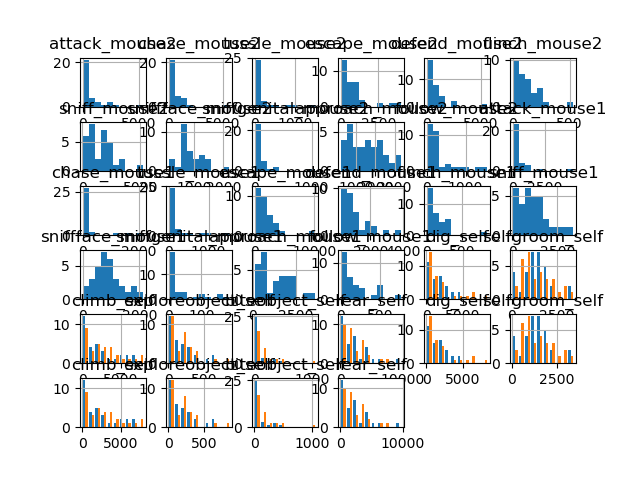

In [26]:
df_summary.hist()

Let's see what we're generally looking at for tagging percentages

In [4]:
df_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
mouse1_attack_mouse2,32.0,0.023847,0.033940,0.000000,0.001232,0.010314,0.032735,0.150776
mouse1_chase_mouse2,32.0,0.022336,0.040312,0.000000,0.000000,0.005155,0.028295,0.157723
mouse1_tussle_mouse2,32.0,0.004406,0.009720,0.000000,0.000000,0.000000,0.002895,0.042400
mouse1_escape_mouse2,32.0,0.027156,0.028075,0.000984,0.010128,0.014995,0.032893,0.112841
mouse1_defend_mouse2,32.0,0.025567,0.030513,0.000000,0.007116,0.017531,0.032326,0.157493
mouse1_flinch_mouse2,32.0,0.003625,0.003090,0.000000,0.001333,0.003097,0.005171,0.014916
mouse1_sniff_mouse2,32.0,0.050843,0.029988,0.002224,0.030560,0.049204,0.064956,0.147708
mouse1_sniffface_mouse2,32.0,0.030139,0.020293,0.006686,0.019266,0.023865,0.035610,0.113178
mouse1_sniffgenital_mouse2,32.0,0.004065,0.007916,0.000000,0.000000,0.001379,0.003676,0.038438
mouse1_approach_mouse2,32.0,0.048473,0.023282,0.005990,0.034779,0.047346,0.063849,0.093979


Is this a fairly unimodal dataset, or are there multiple clusters? 

Let's take a quick at potential clusters using PCA

Text(0.5, 0, 'PC 2')

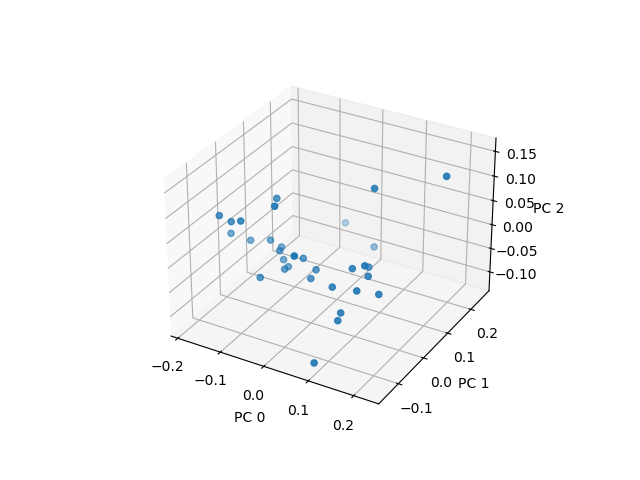

In [18]:
pcs = PCA(n_components=3).fit_transform(df_norm)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2])
ax.set_xlabel('PC 0')
ax.set_ylabel('PC 1')
ax.set_zlabel('PC 2')

Let's try k-means clustering on the full-D space for one through five clusters and see how the clusters work out

Text(0.5, 1.0, 'Inertia as a function of k-clusters')

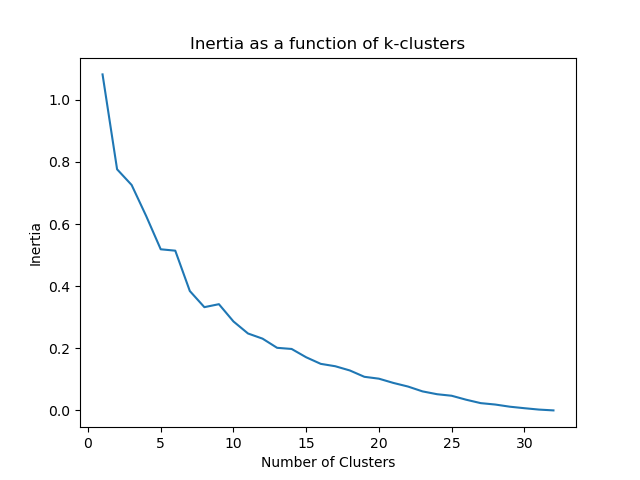

In [17]:
# loop through 1 through 5 clusters
max_clusters = 32

fig_inert,ax_inert = plt.subplots()

clusters = []
inertia = []
for ii in range(max_clusters):
    clusters.append(KMeans(n_clusters=ii+1, n_init='auto').fit(df_norm))
    inertia.append(clusters[ii].inertia_)
    
ax_inert.plot([ii + 1 for ii in range(max_clusters)],inertia)
ax_inert.set_xlabel('Number of Clusters')
ax_inert.set_ylabel('Inertia')
ax_inert.set_title('Inertia as a function of k-clusters')



In [21]:
clusters[0].inertia_

1.081640601445932

### Output the summaries

Write it to a csv

In [ ]:
df_norm.to_csv(os.path.join(base_dir,'summary_percentages.csv'))